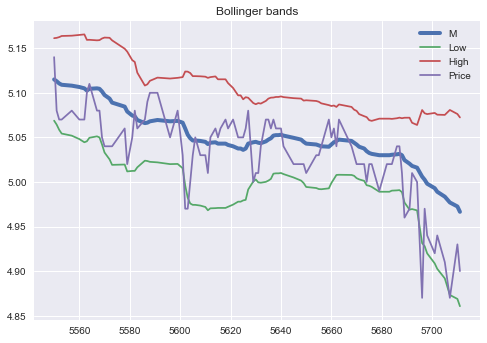

In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
mpl.style.use('seaborn')

import pandas as pd
from ta.utils import dropna
from ta.volatility import BollingerBands


# Load datas
df = pd.read_csv('ta/data/datas.csv', sep=',')

# Clean NaN values
df = dropna(df)

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=df["Close"], window=20, window_dev=2)

# Add Bollinger Bands features
df['bb_bbm'] = indicator_bb.bollinger_mavg()
df['bb_bbh'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()

# Add Bollinger Band high indicator
df['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()

# Add Bollinger Band low indicator
df['bb_bbli'] = indicator_bb.bollinger_lband_indicator()

rangeFrom = 1300
rangeTo = rangeFrom + 100


plt.plot(df['bb_bbm'][rangeFrom:rangeTo], label = 'M', linewidth = 4)
plt.plot(df['bb_bbl'][rangeFrom:rangeTo], label = 'Low')
plt.plot(df['bb_bbh'][rangeFrom:rangeTo], label = 'High')
plt.plot(df["Close"][rangeFrom:rangeTo], label = 'Price')
plt.title("Bollinger bands")
plt.legend()
plt.show()
